In [92]:
import os
import pandas as pd
print(os.listdir())
df = pd.read_csv('clean.csv')
df.head()

['.git', '.ipynb_checkpoints', 'clean.csv', 'Consolidated Data Graphs.ipynb', 'consolidated.graphml', 'Consolidated_Final_colombia.xlsx', 'demographics.xlsx', 'ethiopia data.ipynb', 'Introduction to graphs.ipynb', 'Nairobi_map', 'nutrients.csv', 'nutrients.graphml', 'README.md', 'Tests_version1.ipynb', 'Wikipaedia.graphml', 'Wikipedia analysis.ipynb']


,Unnamed: 0,Firm ID,Sector type,File,For,Amount
0,0,AA-BA-HE-1111,AE,Expense,Investments/assets,600.0
1,1,AA-FE-ED-1009,A,Expense,Rent,15000.0
2,2,AA-FE-ED-1050,A,Expense,Rent,15000.0
3,3,AA-FE-HI-1051,A,Expense,Rent,24000.0
4,4,AA-FE-HI-1154,Photo studio,Expense,Other cost,1500.0


In [93]:
dt = pd.read_excel('demographics.xlsx').drop_duplicates(subset = 'Firm ID')[['Firm ID','Number of Employees']]
df = df.merge(dt,on = 'Firm ID',how = 'left')
df.head(3)

,Unnamed: 0,Firm ID,Sector type,File,For,Amount,Number of Employees
0,0,AA-BA-HE-1111,AE,Expense,Investments/assets,600.0,1
1,1,AA-FE-ED-1009,A,Expense,Rent,15000.0,11
2,2,AA-FE-ED-1050,A,Expense,Rent,15000.0,5


In [94]:
import re
df['Firm ID1'] = [i.split('-')[-1] for i in df['Firm ID']]
df.head()

,Unnamed: 0,Firm ID,Sector type,File,For,Amount,Number of Employees,Firm ID1
0,0,AA-BA-HE-1111,AE,Expense,Investments/assets,600.0,1,1111
1,1,AA-FE-ED-1009,A,Expense,Rent,15000.0,11,1009
2,2,AA-FE-ED-1050,A,Expense,Rent,15000.0,5,1050
3,3,AA-FE-HI-1051,A,Expense,Rent,24000.0,3,1051
4,4,AA-FE-HI-1154,Photo studio,Expense,Other cost,1500.0,4,1154


In [95]:
import networkx as nx

firms = list(df['Firm ID'].unique())
nodes = list(df['Firm ID'].unique())+list(df.For.unique())
G = nx.Graph()
G.add_nodes_from(nodes)
G.nodes()


NodeView(('AA-BA-HE-1111', 'AA-FE-ED-1009', 'AA-FE-ED-1050', 'AA-FE-HI-1051', 'AA-FE-HI-1154', 'AA-FE-HI-2227', 'AA-JS-SA-1282', 'AA-KC-ED-1475', 'AA-KC-ED-1515', 'AA-KC-ED-1592', 'AA-KC-ED-1595', 'AA-KC-ED-2385', 'AA-KE-ED-1005', 'AA-KE-ED-1025', 'AA-KE-ED-1036', 'AA-KE-ED-1065', 'AA-KE-ED-1593', 'AA-KE-HI-1280', 'AA-KE-HI-1283', 'AA-KE-HI-1568', 'AA-KE-HI-2311', 'AA-KE-NA-1373', 'AA-KE-NA-1615', 'AA-KE-SA-1023', 'AA-KE-SA-1043', 'AA-KE-SA-1056', 'AA-KG-SA-1012', 'AA-KG-SA-1020', 'AA-KG-SA-1047', 'AA-KG-SA-1059', 'AA-KG-SA-1068', 'AA-KG-SA-1083', 'AA-KG-SA-1087', 'AA-KG-SA-1312', 'AA-KG-SA-1315', 'AA-KG-SA-1317', 'AA-KG-SA-1336', 'AA-KG-SA-1342', 'AA-KG-SA-1343', 'AA-KG-SA-1376', 'AA-KG-SA-1495', 'AA-KS-NA-1069', 'AA-KS-NA-1086', 'AA-KS-NA-1132', 'AA-KS-NA-1368', 'AA-KS-NA-1382', 'AA-KS-NA-1383', 'AA-KS-NA-1467', 'AA-KS-NA-1551', 'AA-KS-NA-1552', 'AA-KS-NA-1561', 'AA-KS-NA-1603', 'AA-KS-NA-2410', 'AA-ME-HI-1013', 'AA-ME-HI-1159', 'AA-ME-HI-1185', 'AA-ME-HI-1198', 'AA-ME-HI-1262', 'AA-

In [96]:
dt1 = df.groupby(["Firm ID","For",'File'])["Amount"].agg(["sum"]).reset_index()
dt1.head(5)

,Firm ID,For,File,sum
0,AA-BA-HE-1111,Friend,LoanGiven,200.0
1,AA-BA-HE-1111,Income Source 3,Income,370.0
2,AA-BA-HE-1111,Investments/assets,Expense,600.0
3,AA-FE-ED-1009,Income Source 1,Income,25000.0
4,AA-FE-ED-1009,Rent,Expense,15000.0


In [97]:
for i,j,k in zip(df["Firm ID"],df["Number of Employees"],df['Firm ID1']):
    G.nodes()[i]["size"] = j
    G.nodes()[i]["IDS"] = k
G.nodes(data = True)

NodeDataView({'AA-BA-HE-1111': {'size': 1, 'IDS': '1111'}, 'AA-FE-ED-1009': {'size': 11, 'IDS': '1009'}, 'AA-FE-ED-1050': {'size': 5, 'IDS': '1050'}, 'AA-FE-HI-1051': {'size': 3, 'IDS': '1051'}, 'AA-FE-HI-1154': {'size': 4, 'IDS': '1154'}, 'AA-FE-HI-2227': {'size': 9, 'IDS': '2227'}, 'AA-JS-SA-1282': {'size': 7, 'IDS': '1282'}, 'AA-KC-ED-1475': {'size': 21, 'IDS': '1475'}, 'AA-KC-ED-1515': {'size': 18, 'IDS': '1515'}, 'AA-KC-ED-1592': {'size': 4, 'IDS': '1592'}, 'AA-KC-ED-1595': {'size': 12, 'IDS': '1595'}, 'AA-KC-ED-2385': {'size': 12, 'IDS': '2385'}, 'AA-KE-ED-1005': {'size': 10, 'IDS': '1005'}, 'AA-KE-ED-1025': {'size': 7, 'IDS': '1025'}, 'AA-KE-ED-1036': {'size': 4, 'IDS': '1036'}, 'AA-KE-ED-1065': {'size': 10, 'IDS': '1065'}, 'AA-KE-ED-1593': {'size': 5, 'IDS': '1593'}, 'AA-KE-HI-1280': {'size': 5, 'IDS': '1280'}, 'AA-KE-HI-1283': {'size': 3, 'IDS': '1283'}, 'AA-KE-HI-1568': {'size': 5, 'IDS': '1568'}, 'AA-KE-HI-2311': {'size': 15, 'IDS': '2311'}, 'AA-KE-NA-1373': {'size': 5, 'IDS

In [98]:
edges = []
for i,j,k,l in zip(dt1["Firm ID"],dt1["For"],dt1["File"],dt1['sum']):
    if k=='LoanGiven':
        color = 'orange'
    elif k=='Income':
        color = 'green'
    elif k=='Expense':
        color='red'
    else:
        color ='blue'
    
    edges.append((i,j,{'type':k,'amount':l,'color':color}))
G.add_edges_from(edges)
G.edges(data = True)

EdgeDataView([('AA-BA-HE-1111', 'Friend', {'type': 'LoanGiven', 'amount': 200.0, 'color': 'orange'}), ('AA-BA-HE-1111', 'Income Source 3', {'type': 'Income', 'amount': 370.0, 'color': 'green'}), ('AA-BA-HE-1111', 'Investments/assets', {'type': 'Expense', 'amount': 600.0, 'color': 'red'}), ('AA-FE-ED-1009', 'Income Source 1', {'type': 'Income', 'amount': 25000.0, 'color': 'green'}), ('AA-FE-ED-1009', 'Rent', {'type': 'Expense', 'amount': 15000.0, 'color': 'red'}), ('AA-FE-ED-1009', 'Supplier', {'type': 'LoanTaken', 'amount': 10000.0, 'color': 'blue'}), ('AA-FE-ED-1050', 'Customer', {'type': 'LoanGiven', 'amount': 50000.0, 'color': 'orange'}), ('AA-FE-ED-1050', 'Friends', {'type': 'LoanTaken', 'amount': 50000.0, 'color': 'blue'}), ('AA-FE-ED-1050', 'Income Source 1', {'type': 'Income', 'amount': 30000.0, 'color': 'green'}), ('AA-FE-ED-1050', 'Rent', {'type': 'Expense', 'amount': 15000.0, 'color': 'red'}), ('AA-FE-HI-1051', 'Customer', {'type': 'LoanGiven', 'amount': 7500.0, 'color': 'ora

In [100]:
for i in G.nodes():
    if i in dt1['For'].unique():
        G.nodes()[i]["color"] = "#00AE9F"
    else:
        G.nodes()[i]["color"] = "#E4A307"
G.nodes(data = True)

NodeDataView({'AA-BA-HE-1111': {'size': 1, 'IDS': '1111', 'color': '#E4A307'}, 'AA-FE-ED-1009': {'size': 11, 'IDS': '1009', 'color': '#E4A307'}, 'AA-FE-ED-1050': {'size': 5, 'IDS': '1050', 'color': '#E4A307'}, 'AA-FE-HI-1051': {'size': 3, 'IDS': '1051', 'color': '#E4A307'}, 'AA-FE-HI-1154': {'size': 4, 'IDS': '1154', 'color': '#E4A307'}, 'AA-FE-HI-2227': {'size': 9, 'IDS': '2227', 'color': '#E4A307'}, 'AA-JS-SA-1282': {'size': 7, 'IDS': '1282', 'color': '#E4A307'}, 'AA-KC-ED-1475': {'size': 21, 'IDS': '1475', 'color': '#E4A307'}, 'AA-KC-ED-1515': {'size': 18, 'IDS': '1515', 'color': '#E4A307'}, 'AA-KC-ED-1592': {'size': 4, 'IDS': '1592', 'color': '#E4A307'}, 'AA-KC-ED-1595': {'size': 12, 'IDS': '1595', 'color': '#E4A307'}, 'AA-KC-ED-2385': {'size': 12, 'IDS': '2385', 'color': '#E4A307'}, 'AA-KE-ED-1005': {'size': 10, 'IDS': '1005', 'color': '#E4A307'}, 'AA-KE-ED-1025': {'size': 7, 'IDS': '1025', 'color': '#E4A307'}, 'AA-KE-ED-1036': {'size': 4, 'IDS': '1036', 'color': '#E4A307'}, 'AA-K

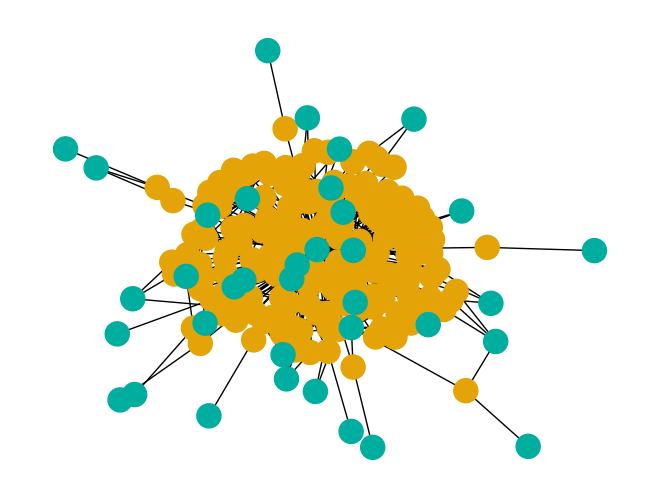

In [101]:
nx.draw(G,
        node_color = [i[1]["color"] for i in G.nodes(data = True)])

In [102]:
nx.write_graphml(G,"SFDGraph.graphml")